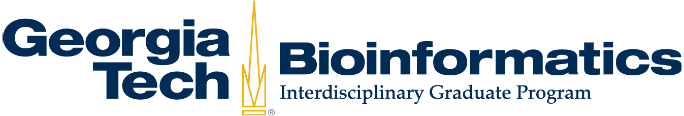

## Read alignment

### BIOS 4150/BIOL 6150
#### Instructor: Dr. King Jordan
#### TAs: Shivam Sharma (shivamsharma13@gatech.edu) & Vishva Natarajan (vishvanata@gatech.edu)


---

# **1. Accessing QCed data from 1000 genomes project**
### *50 points*


---

<div class="alert alert-block alert-warning">
    <h3>1.1 Check the QCed exome file</h3>
    <p>We downloaded and QCed HG01890 in Data Access and QC demo class two weeks ago</p>
</div>

In [3]:
#Have a quick look at the files.
!ls -lh ~/scratch/DataAccessQC/Trimming/


total 4.9G
-rw-r--r-- 1 ssharma454 gtperson 2.5G Oct  4 12:21 SRR710118_1.Trimmed.fastq.gz
-rw-r--r-- 1 ssharma454 gtperson 2.5G Oct  4 12:21 SRR710118_2.Trimmed.fastq.gz


<div class="alert alert-block alert-warning">
    <h3>1.2 Download the reference sequence.</h3>
    <p>We will only use chr16 during today's class, but think about the severe limitations of this. Where is the data coming from? What kind of raw data do we have?</p>    
</div>

## UCSC Golden Path: http://hgdownload.soe.ucsc.edu/goldenPath/hg19/chromosomes/

In [4]:
#Have a quick look at the files.
!wget http://hgdownload.soe.ucsc.edu/goldenPath/hg19/chromosomes/chr16.fa.gz
!ls -lh

--2023-10-13 10:19:39--  http://hgdownload.soe.ucsc.edu/goldenPath/hg19/chromosomes/chr16.fa.gz
Resolving hgdownload.soe.ucsc.edu (hgdownload.soe.ucsc.edu)... 128.114.119.163
Connecting to hgdownload.soe.ucsc.edu (hgdownload.soe.ucsc.edu)|128.114.119.163|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25667827 (24M) [application/x-gzip]
Saving to: ‘chr16.fa.gz’

chr16.fa.gz         100%[===================>]  24.48M  14.4MB/s    in 1.7s    

2023-10-13 10:19:41 (14.4 MB/s) - ‘chr16.fa.gz’ saved [25667827/25667827]

total 38M
-rw-r--r-- 1 ssharma454 gtperson  25M Mar 20  2009 chr16.fa.gz
-rw-r--r-- 1 ssharma454 gtperson 3.9M Oct  4 12:35 DataAccessQualityControl.ipynb
-rw-r--r-- 1 ssharma454 gtperson 3.2M Sep  8 03:49 DataExploration.ipynb
-rw-r--r-- 1 ssharma454 gtperson 477K Sep 15 13:39 ExploringVCFFiles.ipynb
-rw-r--r-- 1 ssharma454 gtperson 443K Oct  4 12:21 fastp.html
-rw-r--r-- 1 ssharma454 gtperson 111K Oct  4 12:21 fastp.json
-rw-r--r-- 1 ssharma454 gtp

In [6]:
#Move the file.
!mkdir ~/scratch/ReadAlignment/
!mv chr16.fa.gz ~/scratch/ReadAlignment/
!ls -lh ~/scratch/ReadAlignment/

total 24M
-rw-r--r-- 1 ssharma454 gtperson 25M Mar 20  2009 chr16.fa.gz


## **2. Aligning WES data to reference sequence**
### *150 points*


---

<div class="alert alert-block alert-warning">
    <h3>2.1 Check if you can use bwa-mem and minimap2</h3>
    <p>Documentations are important for these tools. Do not forget to read them here (https://github.com/lh3/bwa) and here (https://github.com/lh3/minimap2)</p>
</div>

In [8]:
!bwa 


Program: bwa (alignment via Burrows-Wheeler transformation)
Version: 0.7.17-r1188
Contact: Heng Li <lh3@sanger.ac.uk>

Usage:   bwa <command> [options]

Command: index         index sequences in the FASTA format
         mem           BWA-MEM algorithm
         fastmap       identify super-maximal exact matches
         pemerge       merge overlapping paired ends (EXPERIMENTAL)
         aln           gapped/ungapped alignment
         samse         generate alignment (single ended)
         sampe         generate alignment (paired ended)
         bwasw         BWA-SW for long queries

         shm           manage indices in shared memory
         fa2pac        convert FASTA to PAC format
         pac2bwt       generate BWT from PAC
         pac2bwtgen    alternative algorithm for generating BWT
         bwtupdate     update .bwt to the new format
         bwt2sa        generate SA from BWT and Occ

Note: To use BWA, you need to first index the genome with `bwa index'.
      There are

In [9]:
!minimap2

Usage: minimap2 [options] <target.fa>|<target.idx> [query.fa] [...]
Options:
  Indexing:
    -H           use homopolymer-compressed k-mer (preferrable for PacBio)
    -k INT       k-mer size (no larger than 28) [15]
    -w INT       minimizer window size [10]
    -I NUM       split index for every ~NUM input bases [8G]
    -d FILE      dump index to FILE []
  Mapping:
    -f FLOAT     filter out top FLOAT fraction of repetitive minimizers [0.0002]
    -g NUM       stop chain enlongation if there are no minimizers in INT-bp [5000]
    -G NUM       max intron length (effective with -xsplice; changing -r) [200k]
    -F NUM       max fragment length (effective with -xsr or in the fragment mode) [800]
    -r NUM[,NUM] chaining/alignment bandwidth and long-join bandwidth [500,20000]
    -n INT       minimal number of minimizers on a chain [3]
    -m INT       minimal chaining score (matching bases minus log gap penalty) [40]
    -X           skip self and dual mappings (for the all-vs-all m

<div class="alert alert-block alert-warning">
    <h3>2.2 Check the reference sequence</h3>
    <p>See if tools need some operations done it before you can use the fasta files</p>
</div>

In [10]:
!ls -lh ~/scratch/ReadAlignment/

total 25M
-rw-r--r-- 1 ssharma454 gtperson 25M Mar 20  2009 chr16.fa.gz


In [11]:
!gunzip ~/scratch/ReadAlignment/chr16.fa.gz

In [14]:
!ls -lh ~/scratch/ReadAlignment/
!head ~/scratch/ReadAlignment/chr16.fa
!head ~/scratch/ReadAlignment/chr16.fa -n20000 | tail

total 88M
-rw-r--r-- 1 ssharma454 gtperson 88M Mar 20  2009 chr16.fa
>chr16
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
CAGCCAATgacagagtcagagccaacgacagagtcagagacaacgacaga
gttagagacaatgacagagtcagccaacgacagagtcagagccaacgaca
gagtcagagacaatgacagagtcagagacaacgacagagtcagagacgac
agagtcagagacgacagagtcagagCCAATGACAGAGTCAGCCAATGACA
GAGTCAGAGCCAACGACAGAGTCAGCCAATgacagagtcagagacaacga
cagagtcagagacaacgacagagtcagagacgacagagtcagagacgaca
gagtcagagccaatgacagagtcagccaatgacagagtcagagccaacga
cagagtcagccaatgacagagtcagagacaacgacagagttagagacaac
gacagagTCAGCCAAGGACAGCGTCAGCCAACgacagaatcagagacaac
gacaga

<div class="alert alert-block alert-warning">
    <h3>2.3 Alignment using bwa</h3>
    <p>See if tools need some operations done it before you can use the fasta files</p>
</div>

In [20]:
#Index the fasta file.
!bwa index -a rb2 ~/scratch/ReadAlignment/chr16.fa

[bwa_index] Pack FASTA... 0.76 sec
[bwa_index] Construct BWT for the packed sequence...
[bwa_index] 93.86 seconds elapse.
[bwa_index] Update BWT... 0.47 sec
[bwa_index] Pack forward-only FASTA... 0.51 sec
[bwa_index] Construct SA from BWT and Occ... 18.96 sec
[main] Version: 0.7.17-r1188
[main] CMD: bwa index -a rb2 /home/hice1/ssharma454/scratch/ReadAlignment/chr16.fa
[main] Real time: 114.857 sec; CPU: 114.612 sec


In [24]:
#Align
!bwa mem -t 24 ~/scratch/ReadAlignment/chr16.fa ~/scratch/DataAccessQC/Trimming/SRR710118_1.Trimmed.fastq.gz ~/scratch/DataAccessQC/Trimming/SRR710118_2.Trimmed.fastq.gz > ~/scratch/ReadAlignment/SRR710118.sam



[M::bwa_idx_load_from_disk] read 0 ALT contigs
[M::process] read 3244124 sequences (240000074 bp)...
[M::mem_pestat] # candidate unique pairs for (FF, FR, RF, RR): (4, 55196, 21, 5)
[M::mem_pestat] skip orientation FF as there are not enough pairs
[M::mem_pestat] analyzing insert size distribution for orientation FR...
[M::mem_pestat] (25, 50, 75) percentile: (121, 151, 193)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (1, 337)
[M::mem_pestat] mean and std.dev: (158.79, 54.24)
[M::mem_pestat] low and high boundaries for proper pairs: (1, 409)
[M::mem_pestat] analyzing insert size distribution for orientation RF...
[M::mem_pestat] (25, 50, 75) percentile: (118, 1734, 3046)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (1, 8902)
[M::mem_pestat] mean and std.dev: (2064.67, 1839.14)
[M::mem_pestat] low and high boundaries for proper pairs: (1, 11830)
[M::mem_pestat] skip orientation RR as there are not enough pairs
[M::mem_pestat] skip o

[M::process] read 3244188 sequences (240000108 bp)...
[M::mem_process_seqs] Processed 3244200 reads in 278.835 CPU sec, 35.033 real sec
[M::process] read 3244200 sequences (240000140 bp)...
[M::mem_pestat] # candidate unique pairs for (FF, FR, RF, RR): (10, 55282, 17, 10)
[M::mem_pestat] analyzing insert size distribution for orientation FF...
[M::mem_pestat] (25, 50, 75) percentile: (570, 619, 675)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (360, 885)
[M::mem_pestat] mean and std.dev: (618.00, 40.25)
[M::mem_pestat] low and high boundaries for proper pairs: (255, 990)
[M::mem_pestat] analyzing insert size distribution for orientation FR...
[M::mem_pestat] (25, 50, 75) percentile: (119, 148, 189)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (1, 329)
[M::mem_pestat] mean and std.dev: (155.24, 52.55)
[M::mem_pestat] low and high boundaries for proper pairs: (1, 399)
[M::mem_pestat] analyzing insert size distribution for orientation 

[M::mem_process_seqs] Processed 3244254 reads in 278.973 CPU sec, 35.065 real sec
[M::process] read 3244136 sequences (240000046 bp)...
[M::mem_pestat] # candidate unique pairs for (FF, FR, RF, RR): (7, 54303, 11, 7)
[M::mem_pestat] skip orientation FF as there are not enough pairs
[M::mem_pestat] analyzing insert size distribution for orientation FR...
[M::mem_pestat] (25, 50, 75) percentile: (118, 147, 185)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (1, 319)
[M::mem_pestat] mean and std.dev: (153.23, 50.90)
[M::mem_pestat] low and high boundaries for proper pairs: (1, 386)
[M::mem_pestat] analyzing insert size distribution for orientation RF...
[M::mem_pestat] (25, 50, 75) percentile: (1759, 2372, 5332)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (1, 12478)
[M::mem_pestat] mean and std.dev: (3226.45, 2569.35)
[M::mem_pestat] low and high boundaries for proper pairs: (1, 16051)
[M::mem_pestat] skip orientation RR as there are no

In [26]:
#Check the output file.
!head ~/scratch/ReadAlignment/SRR710118.sam
!wc ~/scratch/ReadAlignment/SRR710118.sam

@SQ	SN:chr16	LN:90354753
@PG	ID:bwa	PN:bwa	VN:0.7.17-r1188	CL:bwa mem -t 24 /home/hice1/ssharma454/scratch/ReadAlignment/chr16.fa /home/hice1/ssharma454/scratch/DataAccessQC/Trimming/SRR710118_1.Trimmed.fastq.gz /home/hice1/ssharma454/scratch/DataAccessQC/Trimming/SRR710118_2.Trimmed.fastq.gz
SRR710118.2	83	chr16	72577361	60	28S46M	=	72577294	-113	GCTGTGAAGGACTGTGCCATGAGGGGTGGTGCATTCTGGCCCAGATACTATGCTTTTCCCACAGTCTTTGCAAC	BDDEEEEEDFFFFFEGHHHJIIHFFBB=>@HIHJIEIHGGFGHIIHBIHEGGFDGGEFFC:FEGJJJJJJIHFG	NM:i:2	MD:Z:5C34C5	MC:Z:5S56M13S	AS:i:36	XS:i:25
SRR710118.2	163	chr16	72577294	36	5S56M13S	=	72577361	113	GGAATTGCAAAGGGTCGGGGAACTCCCTCTTCTAGACAAGGGAAGCTGTGAAGGACTGTGCCATGAGGGGTGGT	HEIIJJJJJIGHIJC?DEGH:FGDH>GHGEHFHGI<@GHIIGCHFBEDDCDD>@>=CB@@CCCCC@CCBB&5@5	NM:i:6	MD:Z:5G4T13C0C4C15G9	MC:Z:28S46M	AS:i:26	XS:i:20
SRR710118.3	77	*	0	0	*	*	0	0	TTTTCTTAGATGTTAAGAAGCAGCAACAAATGGCAGCACTTACAAAAGAAAAGGACCAATTATCTCAGTCTATT	HIBIHIGHHIIA?D@G<4DFDDF@HEIII2B>FGGI7FGGHIGI>CEAEE>?@?BBB<ACC>CCCCCC>A>CDC	AS:i:0	X

<div class="alert alert-block alert-warning">
    <h3>2.3 Alignment using minimap2</h3>
    <p>See if tools need some operations done it before you can use the fasta files</p>
</div>

In [27]:
#Index for minimap
!minimap2 -d ~/scratch/ReadAlignment/chr16.mmi ~/scratch/ReadAlignment/chr16.fa    
!ls -lh ~/scratch/ReadAlignment/

[M::mm_idx_gen::2.565*1.02] collected minimizers
[M::mm_idx_gen::3.035*1.32] sorted minimizers
[M::main::3.719*1.26] loaded/built the index for 1 target sequence(s)
[M::mm_idx_stat] kmer size: 15; skip: 10; is_hpc: 0; #seq: 1
[M::mm_idx_stat::3.848*1.25] distinct minimizers: 10028700 (84.63% are singletons); average occurrences: 1.485; average spacing: 6.067; total length: 90354753
[M::main] Version: 2.26-r1175
[M::main] CMD: minimap2 -d /home/hice1/ssharma454/scratch/ReadAlignment/chr16.mmi /home/hice1/ssharma454/scratch/ReadAlignment/chr16.fa
[M::main] Real time: 3.872 sec; CPU: 4.838 sec; Peak RSS: 0.678 GB
total 14G
-rw-r--r-- 1 ssharma454 gtperson  88M Mar 20  2009 chr16.fa
-rw-r--r-- 1 ssharma454 gtperson  111 Oct 13 10:40 chr16.fa.amb
-rw-r--r-- 1 ssharma454 gtperson   42 Oct 13 10:40 chr16.fa.ann
-rw-r--r-- 1 ssharma454 gtperson  87M Oct 13 10:40 chr16.fa.bwt
-rw-r--r-- 1 ssharma454 gtperson  22M Oct 13 10:40 chr16.fa.pac
-rw-r--r-- 1 ssharma454 gtperson  44M Oct 13 10:40 chr16

In [28]:
#Align
!minimap2 -c -a ~/scratch/ReadAlignment/chr16.mmi ~/scratch/DataAccessQC/Trimming/SRR710118_1.Trimmed.fastq.gz ~/scratch/DataAccessQC/Trimming/SRR710118_2.Trimmed.fastq.gz > ~/scratch/ReadAlignment/SRR710118.Minimap.sam  



[M::main::0.525*1.00] loaded/built the index for 1 target sequence(s)
[M::mm_mapopt_update::0.705*1.00] mid_occ = 162
[M::mm_idx_stat] kmer size: 15; skip: 10; is_hpc: 0; #seq: 1
[M::mm_idx_stat::0.832*1.00] distinct minimizers: 10028700 (84.63% are singletons); average occurrences: 1.485; average spacing: 6.067; total length: 90354753
[M::worker_pipeline::29.282*2.67] mapped 6758680 sequences
[M::worker_pipeline::41.892*2.91] mapped 6758745 sequences
[M::worker_pipeline::57.431*3.16] mapped 6758730 sequences
[M::worker_pipeline::71.152*3.26] mapped 6758759 sequences
[M::worker_pipeline::85.462*3.12] mapped 6735088 sequences
[M::worker_pipeline::113.825*3.03] mapped 6758680 sequences
[M::worker_pipeline::126.362*3.07] mapped 6758745 sequences
[M::worker_pipeline::142.163*3.16] mapped 6758730 sequences
[M::worker_pipeline::155.707*3.20] mapped 6758759 sequences
[M::worker_pipeline::170.179*3.13] mapped 6735088 sequences
[M::main] Version: 2.26-r1175
[M::main] CMD: minimap2 -c -a /home/h

In [29]:
#Check the output file.
!head ~/scratch/ReadAlignment/SRR710118.Minimap.sam
!wc ~/scratch/ReadAlignment/SRR710118.Minimap.sam

@HD	VN:1.6	SO:unsorted	GO:query
@SQ	SN:chr16	LN:90354753
@PG	ID:minimap2	PN:minimap2	VN:2.26-r1175	CL:minimap2 -c -a /home/hice1/ssharma454/scratch/ReadAlignment/chr16.mmi /home/hice1/ssharma454/scratch/DataAccessQC/Trimming/SRR710118_1.Trimmed.fastq.gz /home/hice1/ssharma454/scratch/DataAccessQC/Trimming/SRR710118_2.Trimmed.fastq.gz
SRR710118.2	4	*	0	0	*	*	0	0	GTTGCAAAGACTGTGGGAAAAGCATAGTATCTGGGCCAGAATGCACCACCCCTCATGGCACAGTCCTTCACAGC	GFHIJJJJJJGEF:CFFEGGDFGGEHIBHIIHGFGGHIEIJHIH@>=BBFFHIIJHHHGEFFFFFDEEEEEDDB	rl:i:0
SRR710118.3	4	*	0	0	*	*	0	0	TTTTCTTAGATGTTAAGAAGCAGCAACAAATGGCAGCACTTACAAAAGAAAAGGACCAATTATCTCAGTCTATT	HIBIHIGHHIIA?D@G<4DFDDF@HEIII2B>FGGI7FGGHIGI>CEAEE>?@?BBB<ACC>CCCCCC>A>CDC	rl:i:0
SRR710118.6	4	*	0	0	*	*	0	0	GGAGAAAGACCTTTTATATGCAACTGGATGTTTTGTGGCAAAAGATTCACACGGAGTGATGAGCTCCAGAGACA	HJGIGJIIIIJJJJJJJEGIGIGJJJJHIJDGHEHIJIIJJJIGGIJJJIJJIJHH5;@BEEFEDCEDCDDDDD	rl:i:0
SRR710118.7	4	*	0	0	*	*	0	0	GTGTTGAAGATGGGCAATTAGCTACATCATGTAGATAAATAACACTTGTCAGCCTATCACTTTACCTTTCTGTG	F<CFHI

## Don't forget the documentation.

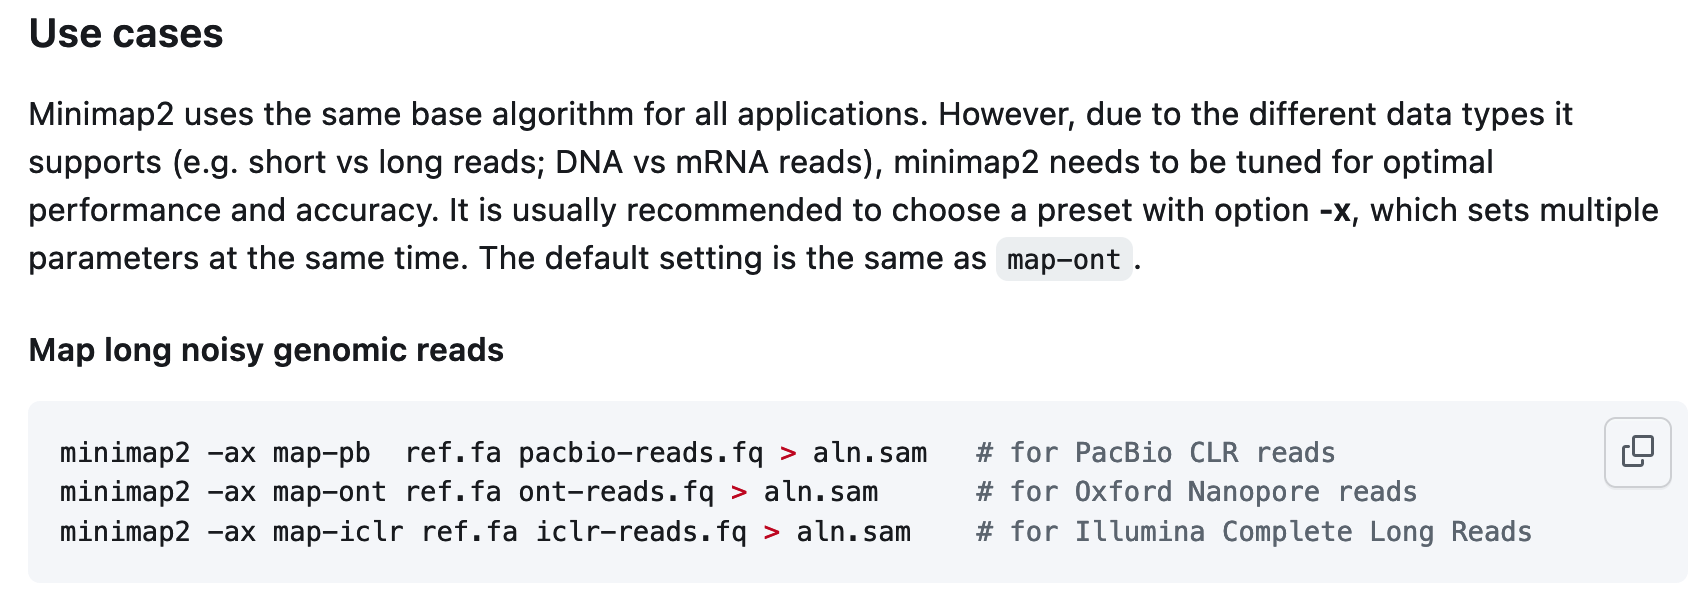